In [36]:
# MÉTODO KNN
# K Nearest Neighbors

In [2]:
# Importações necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Leitura dos dados
df = pd.read_csv("Classified Data",index_col=0)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
df_normalizado = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [28]:
df_param = pd.DataFrame(df_normalizado, columns=df.columns[:-1])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'],test_size=0.3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Método do cotovelo #
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0,0.5,'Taxa de Erro')

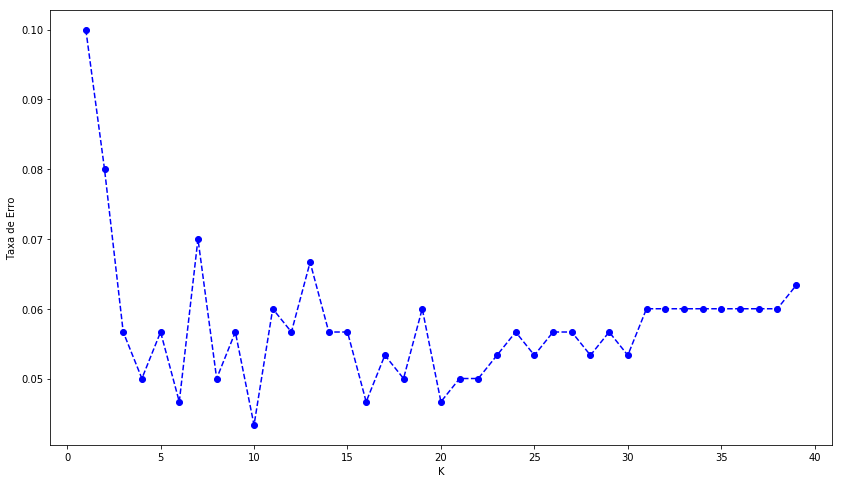

In [33]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       161
          1       0.93      0.98      0.95       139

avg / total       0.96      0.96      0.96       300

